<img src="imgs/dh_logo.png" align="right" width="50%">

# Aula 3.8.2 - Going professional

Fala galera! Tudo bem? Na aula passada, nós atacamos alguns problemas de classificação binária na área de saúde e vimos a importância de métricas, além de entender como utilizar dessas métricas para escolher o melhor algoritmo. Mas resta uma questão: se eu entendo o funcionamento dos algoritmos, eu não posso melhorá-los? Na aula de hoje, continuaremos atacando o dataset de diabetes na Índia, já que ianda não chegamos num resultado bom o bastante (aliás, o que é um resultado bom o bastante num projeto de DS?). Vamos aprender como atacar um problema de classificação binária por completo ;). Bora pra aula!

## Dica de hoje: Let's be Agile! 

Na aula passada entramos em algumas discussões sobre o que é a Metodologia Ágil e porque a usamos no mundo de tecnologia. Com isso em mente, trouxe algumas leituras importantes para vocês: 
 - __[O Manifesto Ágil](https://www.manifestoagil.com.br/)__: basicamente como todos nós fazemos software hoje. Focado no cliente, usuários e funcionalidade, não em processos e coisas que nos desviam do que realmente importa. Ser ágil é estar pronto para se adaptar e fazê-lo com maestria.
 - __[Zero to One](https://www.amazon.com.br/zero-um-Peter-Thiel/dp/8539006200)__, Peter Thiel: ótimo livro para montar mindset de como funciona o mundo de tecnologia e produtos de tech. Peter Thiel, co-founder do Paypal e Palantir, tem a tese de que existem 2 tipos de avanços: aqueles que são evoluções (one to many) e aqueles que são disruptivos (zero to one). Nesse livro, ele mostra o mindset de ir de zero a um.
 - __[SCRUM: a arte de fazer o dobro do trabalho na metade do tempo](https://www.amazon.com.br/Scrum-Fazer-Dobro-Trabalho-Metade/dp/8544104517)__, Jeff Sutherland: é com esse título sugestivo que Jeff Sutherland sintetiza todos seus aprendizados e instaura a metodologia que hoje conhecemos como SCRUM. Baseado em táticas militares de tomada de decisão rápida, o SCRUM é aplicado em todo mundo de tech.
 - __[Lean Startup](https://www.amazon.com.br/startup-enxuta-Eric-Ries-ebook/dp/B00A3C4GAK)__, Eric Ries: não basta sermos ágeis, temos que ter pensamento enxuto - entregar valor de modo rápido, incremental e com foco no cliente. Em seu livro, Eric Ries explica esse novo jeito de fazer negócios.

## Juntando as peças

Antes de atacar o problema, vamos nos contextualizar com os dados: 
<br>

*Who is Pima Indians ? "The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia*<br>

Vamos começar do zero. Temos um problema em mãos: o processo de diagnóstico em comunidades indígenas do Arizona apresenta alguns problemas. Primeiramente, ele é lento, requer muitas consultas e esperar em filas no sistema de saúde deles. Queremos deixar isso mais ágil com um algoritmo. Segundo que, por ser algo manual, está sujeito a variações de médico para médico e erros são cometidos, então queremos diminuir a incidência desses erros o máximao possível. Aliás, precisamos diagnosticar diabetes, então faz sentido conhecer um pouco mais da doença. Consegui extrair esse resumo de um estudo: <br>
***
What is diabetes ?
Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

What are the different types of diabetes? The most common types of diabetes are type 1, type 2, and gestational diabetes.

Type 1 diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

Type 2 diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

Gestational diabetes Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."
***
Ok, agora temos um entendimento melhor do que estamos lidando. **Quando atacando um problema de dados, sempre precisamos nos contextualizar o máximo possível**. Conseguimos alguns dados na aula passada, então vamos começar analisando-os. Na célula abaixo, faça o loading do dataset e já chame os métodos exploratórios `.info()`, `.head()` e `.describe()`, sendo esse último transposto com o comando `.T`.

In [39]:
# Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [40]:
diabetes = pd.read_csv("diabetes.csv", header=0)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
# diabetes.head()

In [42]:
# diabetes.describe().T

OK, então agora sabemos quais features temos em mãos. Há coisas que já podemos entender que são fatores cruciais a partir do nosso entendimento do problema. Por exemplo, já que Diabetes é definida como o excesso dos níveis de glicose no sangue, é de se esperar que a *feature* `Glucose` seja chave para nosso modelo. Decisões desse tipo agilizam nosso processo de desenvolvimento e partem do entendimento da área que temos. Vamos entender alguns *features* que não são tão óbvios a partir dos metadados do dataset:
 - BloodPressure : Diastolic blood pressure (mm Hg). Níveis de glicose afetam a pressão diastólica?
 - SkinThickness: Triceps skin fold thickness (mm)
 - BMI : Body mass index (weight in kg/(height in m)^2). Ok, isso talvez seja um indicador de obesidade, que pode ser importante para nós
 - DiabetesPedigreeFunction : Diabetes pedigree function
 - Pregnancies : Number of times pregnant
 
Ok, agora que entendemos melhor nosso dataset, vamos explorá-lo melhor. Quntas classes de Outcomes temos? Para isso, vamos puxar a série correspondente e usar o método `.unique()` para descobrir seus valores únicos.

In [43]:
diabetes.Outcome.unique()

array([1, 0], dtype=int64)

Okay, de fato nossa classificação é binária, não precisamos nos preocupar com o tipo do diabetes. Vamos agora comparar médias e desvios padrão por classe. Chame os métodos `.groupby()` com *'Outcome'* como argumento, para cada *feature*, seguido de `.mean()` e `.std()`, como no exemplo abaixo. Aliás, cientistas de dados também são programadores. Nem pense em repetir esses passos 1 em cada célula, pense como automtizar esse processo em 1 célula só:

In [44]:
print('Mean and Standard Dev for Glucose levels by Outcome')
print('Mean:')
print(diabetes.groupby('Outcome')['Glucose'].mean())
print('Standard Dev:')
print(diabetes.groupby('Outcome')['Glucose'].std())

Mean and Standard Dev for Glucose levels by Outcome
Mean:
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Standard Dev:
Outcome
0    26.141200
1    31.939622
Name: Glucose, dtype: float64


In [45]:
# %load solutions/solution_06.py
print(diabetes.columns)
for column in diabetes.columns:
    print('Mean and Standard Dev for ', column,' levels by Outcome')
    print('Mean:')
    print(diabetes.groupby('Outcome')[column].mean())
    print('Standard Dev:')
    print(diabetes.groupby('Outcome')[column].std())
    print("="*30)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Mean and Standard Dev for  Pregnancies  levels by Outcome
Mean:
Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
Standard Dev:
Outcome
0    3.017185
1    3.741239
Name: Pregnancies, dtype: float64
Mean and Standard Dev for  Glucose  levels by Outcome
Mean:
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Standard Dev:
Outcome
0    26.141200
1    31.939622
Name: Glucose, dtype: float64
Mean and Standard Dev for  BloodPressure  levels by Outcome
Mean:
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
Standard Dev:
Outcome
0    18.063075
1    21.491812
Name: BloodPressure, dtype: float64
Mean and Standard Dev for  SkinThickness  levels by Outcome
Mean:
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
Standard Dev:
Outcome
0    14.889947
1   

Que conclusões você consegue chegar só com esses groupby e métodos exploratórios? Uma coisa me incomoda e muito: volte no `.describe()` que fizemos. Como podemos ter um valor mínimo 0.0 para glicose, pressão arterial, grossura de pele, insulina e BMI? Esses são valores que não deveriam assumir valor 0.0. É melhor trocar esses valores por `NaN` como flag, para decidirmos depois o que fazer com eles, pois isso é ruído que pode corrromper nossos dados:

In [46]:
diabetes_data_copy = diabetes.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Para transformar os `NaN`, precisamos entender a distribuição de nossos dados

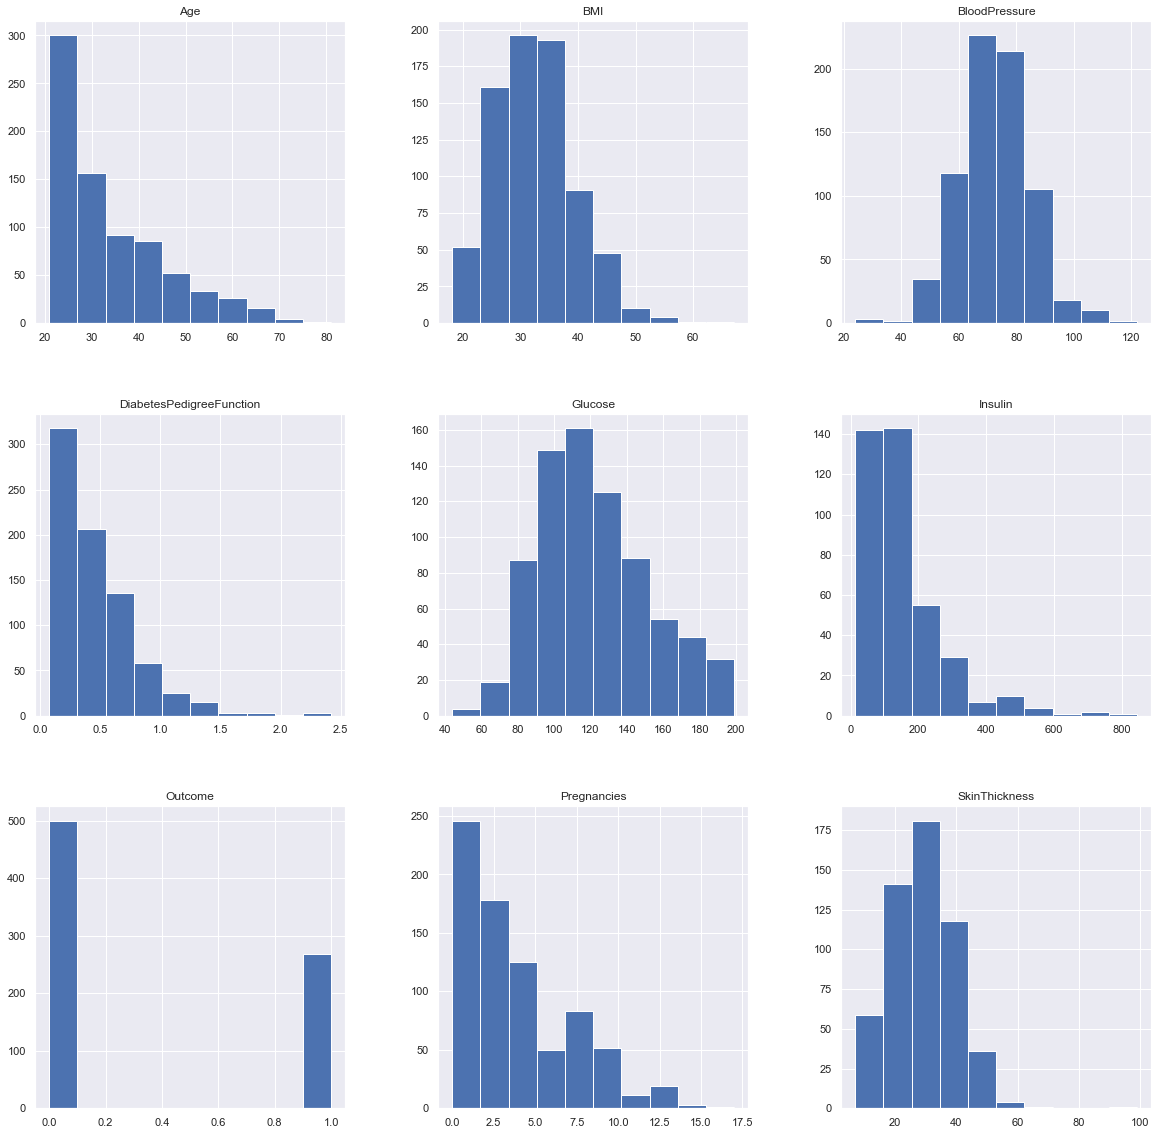

In [47]:
p = diabetes_data_copy.hist(figsize = (20,20))

Temos que glicose e pressão sanguínea seguem distribuições perto da normal, então vamos usar média para elas. Para o restante, que apresenta um fator de *skew*, vamos utilizar mediana de modo a não enviesar nossos dados. Utilize o método `fillna()`, com os respectivos valores de média ou mediana para cada coluna e o argumento *inplace* como True. Sua documentação está __[aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)__.

In [49]:
# %load solutions/solution_07.py
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

Vamos ver como os plots ficaram agora:

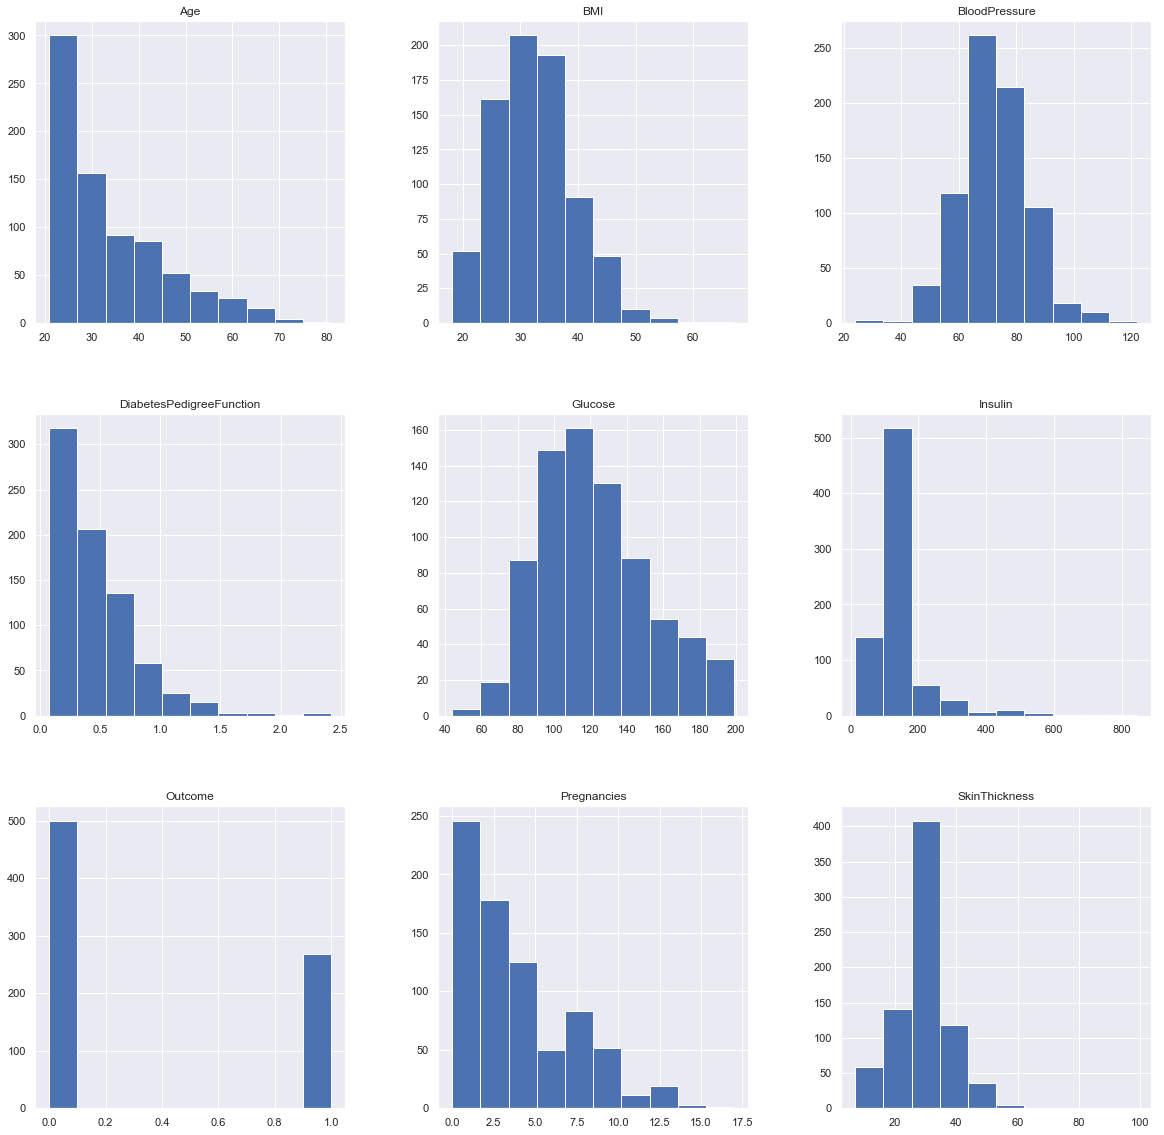

In [50]:
p = diabetes_data_copy.hist(figsize = (20,20))

Legal. Nossos dados parecem estar mais limpos. Vamos ver se estão balanceados:

In [51]:
diabetes_data_copy.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

O número de não diabéticos é quase o dobro, vamos mais pra frente balancear nosso dataset. Falta a gente entender como as features se relacionam, então é válido realizar um pairplot e um heatmap. Dica: ao chamar o pairplot, utilize o argumento `hue` recebendo a feature Outcome, assim temos o pairplot dividido por Outcome. Ao chamar o heatmap, lembre que o argumento principal é o dataset seguido de `.corr()`. Sugiro utilizar o argumento annot como True no heatmap.

In [52]:
# Faça seu pairplot aqui


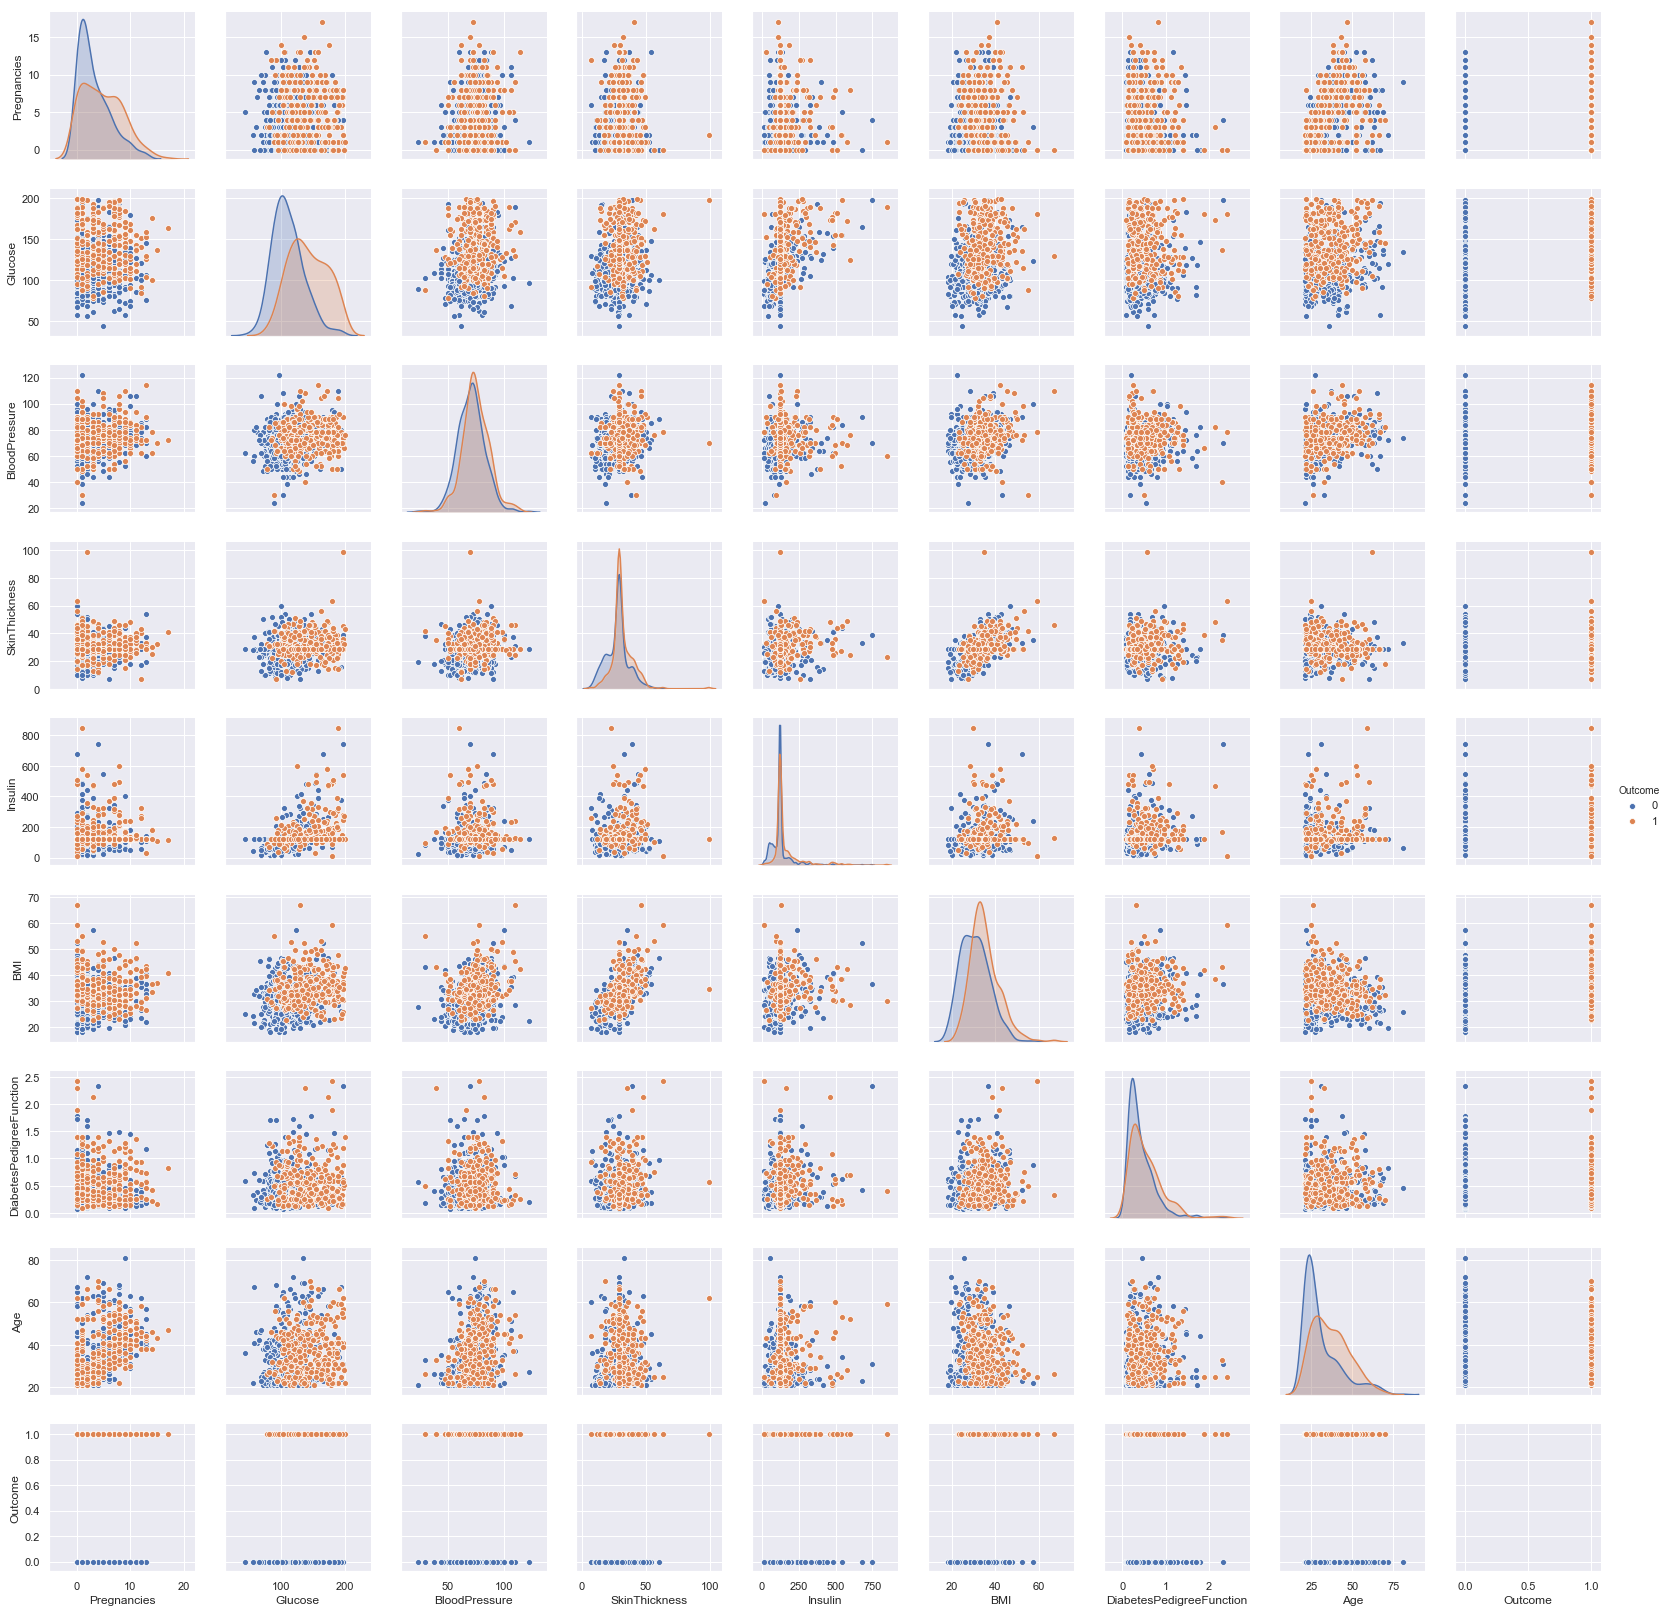

In [53]:
# %load solutions/solution_08.py
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

In [54]:
# Faça seu heatmap aqui


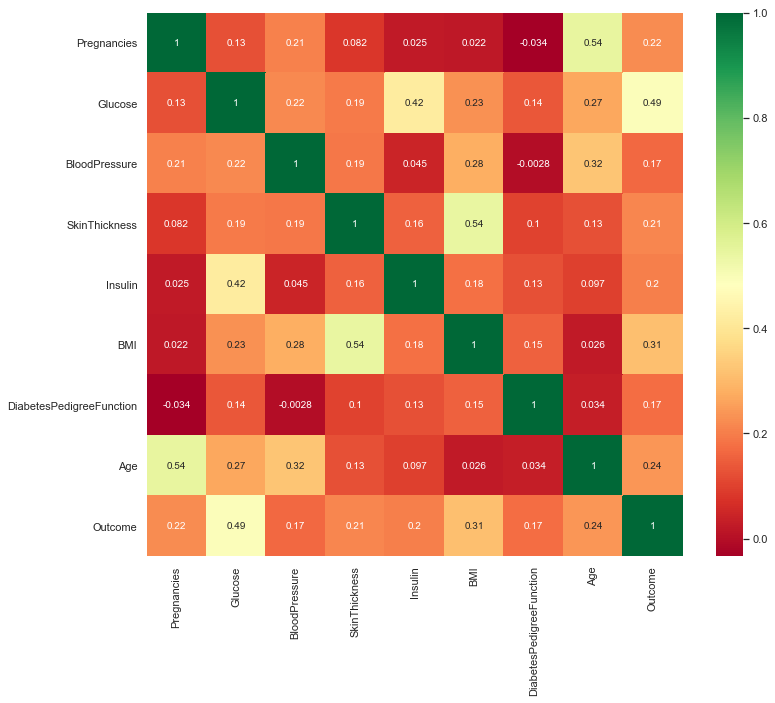

In [55]:
# %load solutions/solution_09.py
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')

Agora precisamos balancear nosso dataset. Vamos implementar o código da aula passada. Condense tudo numa linha.

In [57]:
# %load solutions/solution_10.py
diabetes_data_copy_0 = diabetes_data_copy[diabetes_data_copy.Outcome==0]
diabetes_data_copy_1 = diabetes_data_copy[diabetes_data_copy.Outcome==1]
diabetes_data_copy_0 = diabetes_data_copy_0.sample(n=diabetes_data_copy_1.shape[0], replace=True)
diabetes_data_copy = pd.concat([diabetes_data_copy, diabetes_data_copy_1], ignore_index=True)

O que você consegue concluir a partir desses plots?
Nos resta, então, padronizar nossos dados - as unidades estão muito diferentes. Para isso, vamos usar o `StandardScaler` que já usamos em aulas passadas. Para criar a variável X, que será transformada pelo *scaler*, precisamos isolar as colunas de features por *slicing*. Para criar o y, precisamos somente fazer o slicing da nossa coluna de target. Na célula abaixo, aplique StandardScaler para criar X e y.

In [58]:
# %load solutions/solution_11.py
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

y = diabetes_data_copy.Outcome

Agora que nossos dados já estão prontos e padronizados, vamos implementar nosso pipeline de train-test-plit 80-20 para, então, aplicar os algoritmos de classificação:

In [59]:
# %load solutions/solution_12.py
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Agora vamos aplicar o pipeline de algoritmos e métricas da aula passada:

In [60]:
# %load solutions/solution_13.py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.8857142857142857
Precision: 0.8565737051792829
Recall: 1.0
GaussianNB
****Results****
Accuracy: 0.7396825396825397
Precision: 0.8308457711442786
Recall: 0.7767441860465116
LogisticRegression
****Results****
Accuracy: 0.8222222222222222
Precision: 0.8354430379746836
Recall: 0.9209302325581395
SVC
****Results****
Accuracy: 0.8380952380952381
Precision: 0.8333333333333334
Recall: 0.9534883720930233
DecisionTreeClassifier
****Results****
Accuracy: 0.926984126984127
Precision: 0.9033613445378151
Recall: 1.0
RandomForestClassifier
****Results****
Accuracy: 0.9396825396825397
Precision: 0.9188034188034188
Recall: 1.0
GradientBoostingClassifier
****Results****
Accuracy: 0.8952380952380953
Precision: 0.8760330578512396
Recall: 0.986046511627907


Parece que a Decision Tree está promissora (Porque tanto acc como recall dela estão promissores. Estamos falando de um problema na área de saúde, recall é importantíssimo). Há um modo de torná-la ainda melhor: ela está usando seus hiperparâmetros padrão para essa classificação. Se utilizarmos outros valores para cada hiperparâmetro, podemos aumentar sua performance. Chamamos isso de fine-tuning, e o realizamos com um método chamado GridSearch

In [61]:
clf_tree = DecisionTreeClassifier()

In [ ]:
clf_tree()

In [62]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [73]:
for i in range(1,10,2):
    print(i)

1
3
5
7
9


In [74]:
parameters = {
    'criterion': ('gini','entropy'),
    'max_depth': [1,4,6,9],
    'min_samples_split': [3,5,7] 
    }

In [75]:
clf=GridSearchCV(clf_tree,parameters, cv = 5)
clf.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 4, 6, 9], 'min_samples_split': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}

In [77]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
print("Best Parameters: " + str(clf.best_params_))
print('****Results****')
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}
****Results****
Accuracy: 0.9365079365079365
Precision: 0.9148936170212766
Recall: 1.0


Bem melhor! Agora sim, conseguimos fazer nossa primeira implementação completa de modelagem de ML! Repare que gastamos muito mais tempo lidando com os dados, limpando e manipulando-os do que aplicando os algoritmos de fato. Isso é natural, pois a maior parte do nosso tempo deve ser focada em decisões, não implementações do zero. Hooray ;)